In [1]:
import cv2
from skimage import data
from skimage import filters
from skimage import exposure
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import imFerramentas as imF

### Carregando a imagem, diminuindo o tamanho, e convertendo de BGR para RGB

In [2]:
img = cv2.imread("../imagens/Atividade2a.jpg")
escala = 70
largura = int(img.shape[1] * escala / 100)
altura = int(img.shape[0] * escala / 100)
dim = (largura, altura)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
imgRGB= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

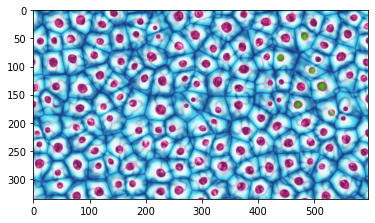

In [3]:
#Exibindo a imagem nova
plt.imshow(imgRGB)

### Analisando os canais R, G e B

(array([   46.,    56.,    81.,    69.,    47.,    66.,    46.,    53.,
          105.,   524.,  1430.,  1914.,  2064.,  1871.,  2408.,  3117.,
         4494.,  5053.,  4689.,  6076.,  7151.,  8590.,  8059.,  9532.,
        10434., 12009., 15368., 15387., 21130., 25824., 25786.,  6777.]),
 array([  6.     ,  13.78125,  21.5625 ,  29.34375,  37.125  ,  44.90625,
         52.6875 ,  60.46875,  68.25   ,  76.03125,  83.8125 ,  91.59375,
         99.375  , 107.15625, 114.9375 , 122.71875, 130.5    , 138.28125,
        146.0625 , 153.84375, 161.625  , 169.40625, 177.1875 , 184.96875,
        192.75   , 200.53125, 208.3125 , 216.09375, 223.875  , 231.65625,
        239.4375 , 247.21875, 255.     ]),
 <BarContainer object of 32 artists>)

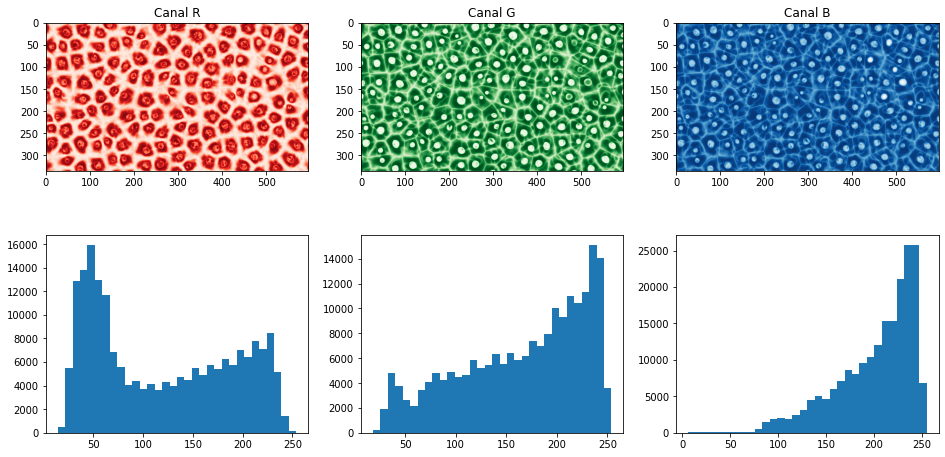

In [4]:
fig = plt.figure(figsize=(16, 8))
sub_imagem = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(imgRGB[:,:,0],cmap="Reds")
sub_imagem.set_title('Canal R')

sub_imagem = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(imgRGB[:,:,1],cmap="Greens")
sub_imagem.set_title('Canal G')

sub_imagem = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(imgRGB[:,:,2],cmap="Blues")
sub_imagem.set_title('Canal B')

sub_imagem = fig.add_subplot(2, 3, 4)
plt.hist(imgRGB[:,:,0].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 5)
plt.hist(imgRGB[:,:,1].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 6)
plt.hist(imgRGB[:,:,2].flatten(), 32)

Observando os histogramas e as imagens dos canais R, G e B podemos notar que este canal de cor não é adequado para identificar e contabilizar as células verdes.

### Testando o canal de cor HSV

(array([6.0000e+00, 2.4000e+01, 5.0000e+01, 9.7000e+01, 1.9100e+02,
        3.2200e+02, 4.6600e+02, 5.1200e+02, 8.8400e+02, 1.7160e+03,
        2.1560e+03, 3.4810e+03, 3.9870e+03, 4.4440e+03, 4.2190e+03,
        5.4830e+03, 6.2200e+03, 5.9000e+03, 7.5410e+03, 7.7960e+03,
        7.9840e+03, 6.9610e+03, 8.9510e+03, 1.0195e+04, 9.9750e+03,
        1.2976e+04, 1.4538e+04, 1.6791e+04, 1.5855e+04, 2.0059e+04,
        1.6880e+04, 3.5960e+03]),
 array([ 72.     ,  77.71875,  83.4375 ,  89.15625,  94.875  , 100.59375,
        106.3125 , 112.03125, 117.75   , 123.46875, 129.1875 , 134.90625,
        140.625  , 146.34375, 152.0625 , 157.78125, 163.5    , 169.21875,
        174.9375 , 180.65625, 186.375  , 192.09375, 197.8125 , 203.53125,
        209.25   , 214.96875, 220.6875 , 226.40625, 232.125  , 237.84375,
        243.5625 , 249.28125, 255.     ]),
 <BarContainer object of 32 artists>)

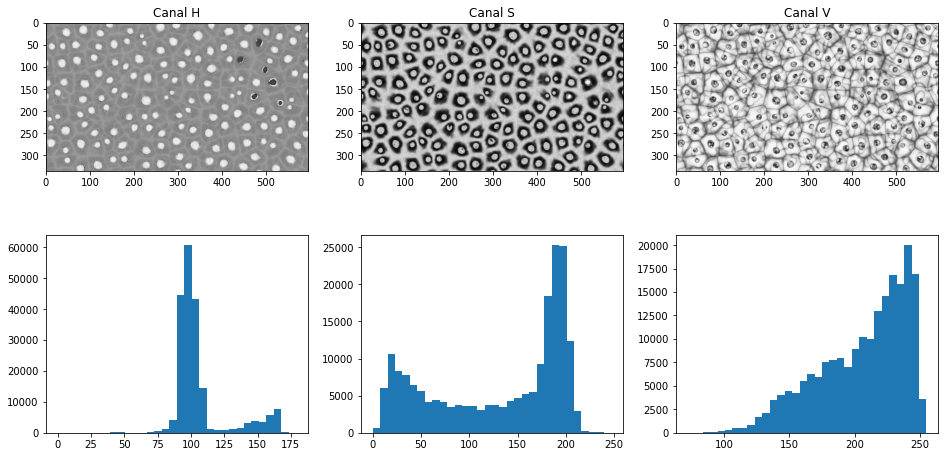

In [5]:
#imgMediaBlur = cv2.blur(img, (5, 5))
imgHSV= cv2.cvtColor(imgRGB, cv2.COLOR_RGB2HSV)

fig = plt.figure(figsize=(16, 8))
sub_imagem = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(imgHSV[:,:,0],cmap="gray")
sub_imagem.set_title('Canal H')

sub_imagem = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(imgHSV[:,:,1],cmap="gray")
sub_imagem.set_title('Canal S')

sub_imagem = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(imgHSV[:,:,2],cmap="gray")
sub_imagem.set_title('Canal V')

sub_imagem = fig.add_subplot(2, 3, 4)
plt.hist(imgHSV[:,:,0].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 5)
plt.hist(imgHSV[:,:,1].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 6)
plt.hist(imgHSV[:,:,2].flatten(), 32)

Observando as imagens notamos que o Canal H apresenta a melhor separação das células verdes

### Aplicando filtros para melhor visualização no canal H

(array([6.0000e+00, 2.4000e+01, 5.0000e+01, 9.7000e+01, 1.9100e+02,
        3.2200e+02, 4.6600e+02, 5.1200e+02, 8.8400e+02, 1.7160e+03,
        2.1560e+03, 3.4810e+03, 3.9870e+03, 4.4440e+03, 4.2190e+03,
        5.4830e+03, 6.2200e+03, 5.9000e+03, 7.5410e+03, 7.7960e+03,
        7.9840e+03, 6.9610e+03, 8.9510e+03, 1.0195e+04, 9.9750e+03,
        1.2976e+04, 1.4538e+04, 1.6791e+04, 1.5855e+04, 2.0059e+04,
        1.6880e+04, 3.5960e+03]),
 array([ 72.     ,  77.71875,  83.4375 ,  89.15625,  94.875  , 100.59375,
        106.3125 , 112.03125, 117.75   , 123.46875, 129.1875 , 134.90625,
        140.625  , 146.34375, 152.0625 , 157.78125, 163.5    , 169.21875,
        174.9375 , 180.65625, 186.375  , 192.09375, 197.8125 , 203.53125,
        209.25   , 214.96875, 220.6875 , 226.40625, 232.125  , 237.84375,
        243.5625 , 249.28125, 255.     ]),
 <BarContainer object of 32 artists>)

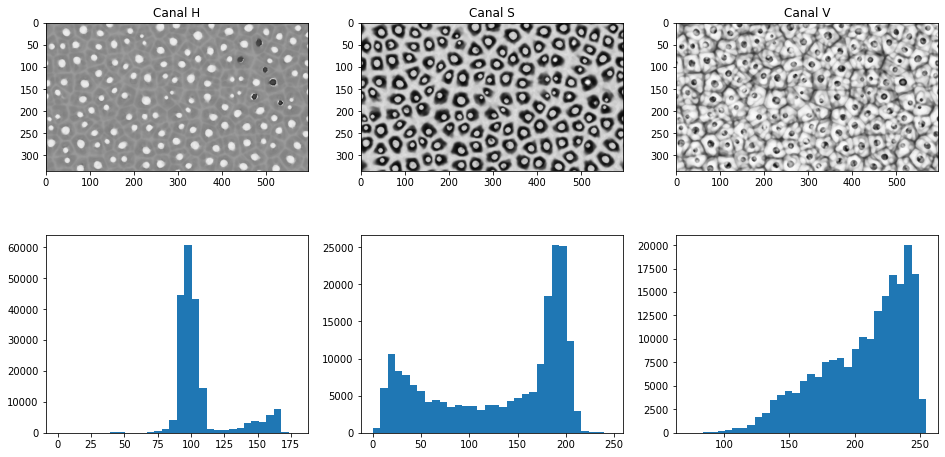

In [6]:
imgMediaBlur = cv2.medianBlur(imgRGB, 5)
img_HSV= cv2.cvtColor(imgMediaBlur, cv2.COLOR_RGB2HSV)

fig = plt.figure(figsize=(16, 8))
sub_imagem = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(img_HSV[:,:,0],cmap="gray")
sub_imagem.set_title('Canal H')

sub_imagem = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(img_HSV[:,:,1],cmap="gray")
sub_imagem.set_title('Canal S')

sub_imagem = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(img_HSV[:,:,2],cmap="gray")
sub_imagem.set_title('Canal V')

sub_imagem = fig.add_subplot(2, 3, 4)
plt.hist(imgHSV[:,:,0].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 5)
plt.hist(imgHSV[:,:,1].flatten(), 32)

sub_imagem = fig.add_subplot(2, 3, 6)
plt.hist(imgHSV[:,:,2].flatten(), 32)

### Testando diferentes valores de limiarização para obter a melhor máscara.

Text(0.5, 1.0, 'Canal H Limiarizado (100-120)')

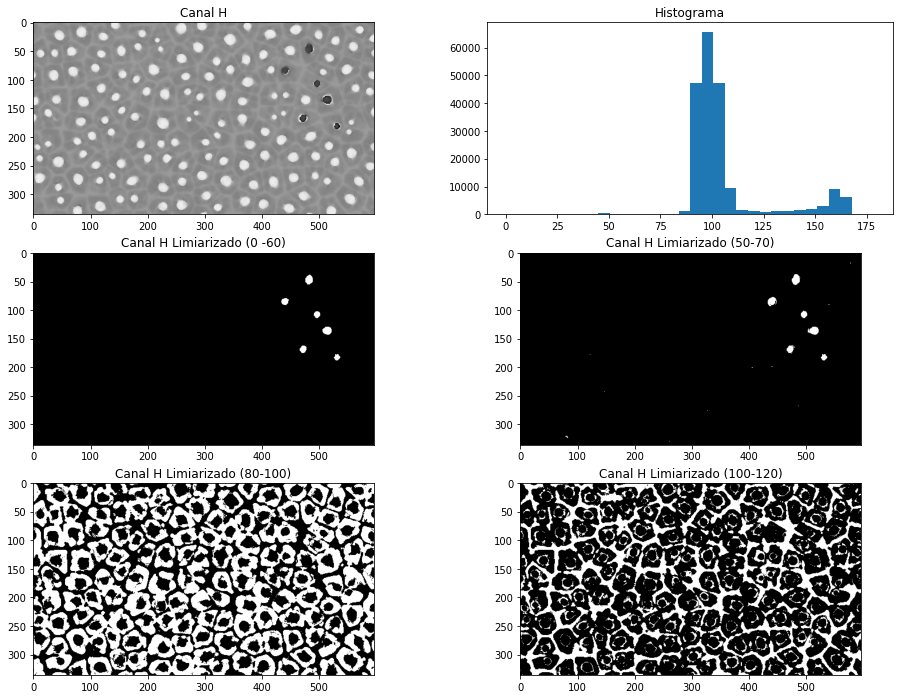

In [7]:
canal_H = img_HSV[:,:,0]

fig = plt.figure(figsize=(16, 12))

sub_imagem = fig.add_subplot(3, 2, 1)
imgplot = plt.imshow(canal_H,cmap="gray")
sub_imagem.set_title('Canal H')

sub_imagem = fig.add_subplot(3, 2, 2)
plt.hist(canal_H.flatten(), 32)
sub_imagem.set_title('Histograma')

sub_imagem = fig.add_subplot(3, 2, 3)
canal_H_lim = imF.limiarizacao_janela(canal_H, 0,60)
imgplot = plt.imshow(canal_H_lim,cmap="gray")
sub_imagem.set_title('Canal H Limiarizado (0 -60)')

sub_imagem = fig.add_subplot(3, 2, 4)
canal_H_lim = imF.limiarizacao_janela(canal_H, 0,80) 
imgplot = plt.imshow(canal_H_lim,cmap="gray")
sub_imagem.set_title('Canal H Limiarizado (50-70)')


sub_imagem = fig.add_subplot(3, 2, 5)
canal_H_lim = imF.limiarizacao_janela(canal_H, 80,100) 
imgplot = plt.imshow(canal_H_lim,cmap="gray")
sub_imagem.set_title('Canal H Limiarizado (80-100)')


sub_imagem = fig.add_subplot(3, 2, 6)
canal_H_lim = imF.limiarizacao_janela(canal_H, 100,120) 
imgplot = plt.imshow(canal_H_lim,cmap="gray")
sub_imagem.set_title('Canal H Limiarizado (100-120)')

### Aplicando a máscara sob a imagem original

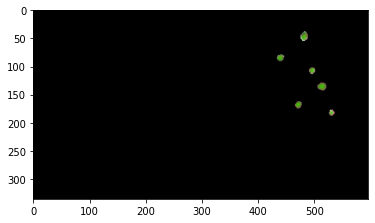

In [8]:
canal_H_lim = imF.limiarizacao_janela(canal_H, 0,60) #Melhor limiarização foi com o intervalo 0 - 60

final=cv2.bitwise_and(imgRGB,imgRGB,mask=canal_H_lim)
plt.imshow(final)

### Contando a quantidade de pixels verdes para detectar células verdes

In [17]:
def aplica_mascara(img):
    """Recebe a imagem em BGR, e retorna o total de pixels verde"""
    imgMediaBlur = cv2.medianBlur(img, 5)
    img_HSV= cv2.cvtColor(imgMediaBlur, cv2.COLOR_BGR2HSV)
    canal_H = img_HSV[:,:,0]
    canal_H_lim = imF.limiarizacao_janela(canal_H, 0,60) #Melhor limiarização foi com o intervalo 0 - 60
    final=cv2.bitwise_and(img,img,mask=canal_H_lim)
    return final


In [35]:
def count_total_green(img):
    """Recebe a imagem com a mascara aplicada e conta o total de pixels verdes"""
    greens = 0
    for i in img[:,:,1].flatten():
        if i > 240:
            greens = greens + 1
    return greens

In [39]:
def detect_green_cells(img):
    """Recebe a imagem e BGR e diz se a mesma possui ou não celulas verdes"""
    img_mask = aplica_mascara(img)
    greens = count_total_green(img_mask)
    if(greens > 10):
        print("Celula verde detectada")
    else:
        print("Não há celulas verdes na imagem")

### Por fim verificamos a presença de celulas verdes em ambas as imagens

In [44]:
img = cv2.imread("../imagens/Atividade2a.jpg")
detect_green_cells(img)

img = cv2.imread("../imagens/Atividade2b.jpg")
detect_green_cells(img)

Celula verde detectada
Não há celulas verdes na imagem
